In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from code import interact
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


## Part 2 : Time series with the accumulated fuel rate

In [3]:
df = pd.read_csv(r'C:\Users\Kun\Downloads\month_7.csv')
df.head()

C:\Users\Kun\AppData\Local\Temp\ipykernel_980\1349322939.py:1: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Kun\Downloads\month_7.csv')


,Unnamed: 0,timestamp,engineFuelRate,engineSpeed,latitude,longitude,windDirectionApparent,windDirectionTrue,windSpeedApparent,windSpeedOverGround,...,legUUID,on_route,mainRouteId,distanceToNextDock,distanceToPreviousDock,segmentId,segmentUUID,accumFuelLeg,accumDistLeg,accumTimeLeg
0,8017292,2022-07-01 00:00:00.000,1.0,0.0,59.331653,18.079153,270.0923,130.2963,1.440,1.49,...,57c14d10-792c-4526-90ab-f2d29fa36e25,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,20.647542,3948.035487,71163.0
1,8017293,2022-07-01 00:00:00.300,1.0,0.0,59.331653,18.079153,270.0923,125.6955,1.590,1.54,...,57c14d10-792c-4526-90ab-f2d29fa36e25,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,20.647625,3948.037413,71163.3
2,8017294,2022-07-01 00:00:00.600,1.0,0.0,59.331653,18.079153,270.0923,127.4946,1.590,1.49,...,57c14d10-792c-4526-90ab-f2d29fa36e25,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,20.647708,3948.039432,71163.6
3,8017295,2022-07-01 00:00:00.900,1.0,0.0,59.331653,18.079153,270.0923,127.4946,1.590,1.49,...,57c14d10-792c-4526-90ab-f2d29fa36e25,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,20.647792,3948.041884,71163.9
4,8017296,2022-07-01 00:00:01.200,1.0,0.0,59.331653,18.079152,271.8914,127.4946,1.515,1.49,...,57c14d10-792c-4526-90ab-f2d29fa36e25,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,20.647875,3948.045117,71164.2


In [19]:
df = df.loc[df.engineSpeed > 550]
df.shape

(3426523, 49)

In [1]:
df['timestamp'].isnull().sum()

NameError: name 'df' is not defined

In [22]:
df['timestamp'] = df['timestamp'].replace([':', '-', ' '],'', regex=True)
df.head(2)

C:\Users\Kun\AppData\Local\Temp\ipykernel_980\1578772043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = df['timestamp'].replace([':', '-', ' '],'', regex=True)


,Unnamed: 0,timestamp,engineFuelRate,engineSpeed,latitude,longitude,windDirectionApparent,windDirectionTrue,windSpeedApparent,windSpeedOverGround,...,legUUID,on_route,mainRouteId,distanceToNextDock,distanceToPreviousDock,segmentId,segmentUUID,accumFuelLeg,accumDistLeg,accumTimeLeg
93943,8111235,2.022070e+13,3.0,752.00,59.331634,18.079097,283.5912,139.5954,6.53,6.68,...,57c14d10-792c-4526-90ab-f2d29fa36e25,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,29.327333,5680.895903,99345.9
93944,8111236,2.022070e+13,3.0,772.75,59.331634,18.079097,281.4426,139.5954,6.66,6.68,...,57c14d10-792c-4526-90ab-f2d29fa36e25,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,29.327583,5680.908730,99346.2


In [24]:
df['timestamp'] = df['timestamp'].astype('float')

C:\Users\Kun\AppData\Local\Temp\ipykernel_980\3773534979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = df['timestamp'].astype('float')


In [25]:
df_day1 = df.loc[(20220701000000.000 < df['timestamp']) & (df['timestamp'] < 20220702000000.000)]

- Defind the accumulated fuel rate over time

In [9]:
df['FuelConsumption'] = df['engineFuelRate']*0.3/3600

In [10]:
df['accum_fuel'] = df['FuelConsumption'].cumsum()
df['accum_fuel'].head(5)

93943    0.00025
93944    0.00050
93945    0.00075
93946    0.00100
93947    0.00125
Name: accum_fuel, dtype: float64

In [11]:
df['accum_fuel'].describe()

count    3.426523e+06
mean     2.932105e+04
std      1.720556e+04
min      2.500000e-04
25%      1.458322e+04
50%      2.903469e+04
75%      4.425852e+04
max      5.975484e+04
Name: accum_fuel, dtype: float64

- The total Fuel consumption during July was around 60,000 L

[Text(0.5, 0, 'time line'),
 Text(0, 0.5, 'Fuel consumption'),
 Text(0.5, 1.0, 'accumulated Fuel consumption in July')]

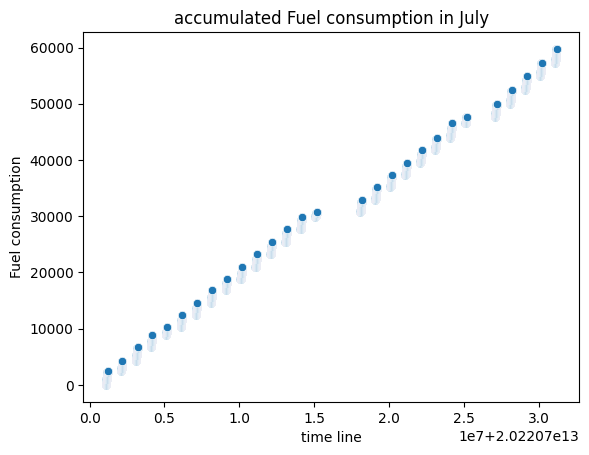

In [13]:
sns.scatterplot(data=df, x=df.timestamp, y=df.accum_fuel).set(xlabel="time line", ylabel = "Fuel consumption", title= "accumulated Fuel consumption in July")

In [14]:
X, y = df[["engineSpeed", "speedOverGround"]], df["accum_fuel"]
X.head(5), y.head(5)

(       engineSpeed  speedOverGround
 93943       752.00         0.074821
 93944       772.75         0.068283
 93945       793.50         0.061961
 93946       766.50         0.055971
 93947       707.00         0.050475,
 93943    0.00025
 93944    0.00050
 93945    0.00075
 93946    0.00100
 93947    0.00125
 Name: accum_fuel, dtype: float64)

### Modelling

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
    
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2295770, 2), (2295770,), (565376, 2), (565376,), (565377, 2), (565377,))

- Normalization (min-max feature scaling)

In [16]:
scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(f"{scaled_X_train.min():.2f} ≤ scaled_X_train ≤ {scaled_X_train.max():.2f}")
print(f"{scaled_X_test.min():.2f} ≤ scaled_X_test ≤ {scaled_X_test.max():.2f}") 

0.00 ≤ scaled_X_train ≤ 1.00
0.00 ≤ scaled_X_test ≤ 1.00


In [17]:
model_SVD = LinearRegression(fit_intercept = True)
model_SVD.fit(scaled_X_train, y_train)
print(f"Parameters: {model_SVD.coef_}")
print(f"Intercept: {model_SVD.intercept_}")

Parameters: [  9252.79871958 -11077.12948025]
Intercept: 28600.099038258704


In [18]:
model_SGD = SGDRegressor(loss = "squared_error", learning_rate="invscaling", max_iter = 1000)
model_SGD.fit(scaled_X_train, y_train)
print(f"Parameters: {model_SGD.coef_}")
print(f"Intercept: {model_SGD.intercept_}")

Parameters: [  9124.96466768 -11049.58523022]
Intercept: [28812.25714048]


In [23]:
test_sample_features = scaled_X_test[5566].reshape(1,-1)
test_sample_target = y_test.values[5566]

print(f"Scaled features {test_sample_features}, label {test_sample_target:.7f}")
print(f"Prediction SVD: {model_SVD.predict(test_sample_features)[0]:.7f}")
print(f"Prediction SGD: {model_SGD.predict(test_sample_features)[0]:.7f}")

Scaled features [[0.96755464 0.7205966 ]], label 19512.4681250
Prediction SVD: 29570.5455679
Prediction SGD: 29678.8655324


In [20]:
y_pred_SVD = model_SVD.predict(scaled_X_test)
y_pred_SGD = model_SGD.predict(scaled_X_test)

mae_SVD = mean_absolute_error(y_test, y_pred_SVD)
mse_SVD = mean_squared_error(y_test, y_pred_SVD)
rmse_SVD = np.sqrt(mse_SVD)

mae_SGD = mean_absolute_error(y_test, y_pred_SGD)
mse_SGD = mean_squared_error(y_test, y_pred_SGD)
rmse_SGD = np.sqrt(mse_SGD)

print(f"SVD, MAE: {mae_SVD:.7f}, MSE: {mse_SVD:.7f}, RMSE: {rmse_SVD:.7f}")
print(f"SGD, MAE: {mae_SGD:.7f}, MSE: {mse_SGD:.7f}, RMSE: {rmse_SGD:.7f}")

SVD, MAE: 14885.0731509, MSE: 294419804.2691927, RMSE: 17158.6655737
SGD, MAE: 14886.7879259, MSE: 294441573.7659814, RMSE: 17159.2999206
